In [1]:
# some imports
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
# Others
import cv2
import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from skimage.io import imread

 ## Import data

In [2]:
# Paths
X_train_path = './dataset/train/train/train/'
X_test_path = './dataset/test/test/test/'
dataset_csv = './dataset/train.txt'
dataset_train = './dataset/train/train'
dataset_test = './dataset/test/test'


In [3]:
_STOP = 1000
def preprocess(img_paths,dataset_path,preprocess_img_method = None):
    print("loading data")
    data = []
    stop = 0
    for img_path in tqdm.tqdm(img_paths):
        path = os.path.realpath(os.path.join(dataset_path,img_path[1:]))
        img = imread(path)
        if preprocess_img_method:
            img = preprocess_img_method(img)
        else:
            # img = cv2.resize(img,(224,224),cv2.INTER_AREA)
            img = img / 255. #normalize
        data.append(img)
        stop += 1
        if(stop == _STOP):
            break
    print("loading data done")
    return data

def preprocess_img_vgg(img):
    return preprocess_input(img)


In [4]:
df = pd.read_csv(dataset_csv, delimiter='\ ', header=None)
y_train_full = np.array(df[1])[:_STOP]
img_paths = df[0]
X_train_full = preprocess(df[0], dataset_train,preprocess_img_method=None)
X_train_full= np.stack(X_train_full)

C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


loading data


  7%|▋         | 999/15000 [00:00<00:13, 1017.12it/s]


loading data done


In [5]:
print(np.max(y_train_full))

29


In [6]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [7]:
n_classes = np.max(y_train_full)+1
# transform output
new_y_train=[]
for val in y_train_full:
    list = [0]*n_classes
    list[val] = 1
    new_y_train.append(np.array(list))
new_y_train=np.stack(new_y_train)

In [8]:
n_classes = np.max(y_train_full)+1
y_train_one_hot = one_hot(y_train_full,n_classes)
print(y_train_one_hot.shape)

(1000, 30)


In [9]:
# Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_one_hot, random_state=42,test_size=0.2)
X_train = X_train.astype("float32")
X_valid = X_valid.astype("float32")
y_train = y_train.astype("float32")
y_valid = y_valid.astype("float32")

In [17]:
print(X_train[0].shape)
print(X_train[0])

print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))

print(len(X_train))
print(X_train[0].shape)
print(type(X_train))
print(X_train.shape)
print(type(X_train[0]))
print(y_train[:10])

(158, 158)
[[0.39607844 0.4        0.3764706  ... 0.26666668 0.23921569 0.29411766]
 [0.3137255  0.29411766 0.44705883 ... 0.29803923 0.20392157 0.3372549 ]
 [0.3529412  0.38431373 0.40784314 ... 0.34117648 0.25882354 0.27450982]
 ...
 [0.45882353 0.47843137 0.4862745  ... 0.6901961  0.6784314  0.76862746]
 [0.50980395 0.5137255  0.5058824  ... 0.70980394 0.7019608  0.7607843 ]
 [0.53333336 0.5254902  0.5176471  ... 0.75686276 0.72156864 0.74509805]]
800
800
200
200
800
(158, 158)
<class 'numpy.ndarray'>
(800, 158, 158)
<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

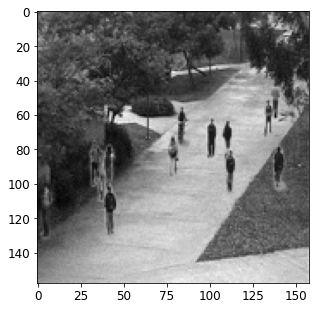

In [18]:
plt.imshow(X_train[1], cmap='gray')

no_classes = np.max(y_train_full)+1

## Model

In [11]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Reshape([158, 158, 1], input_shape=[158, 158]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.Conv2D(256, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(name="flatten1"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(no_classes, activation="linear",name="prediction")
])
# model = keras.models.Sequential([conv_encoder, conv_decoder])

In [12]:
model.summary()
def RMSE(y_true, y_pred):
    # y_truess.append(y_true)
    # y_predss.append(y_pred)
    tf.print(y_true, "This is y_true")
    tf.print(y_pred, "This is y_pred")
    return tf.sqrt(tf.reduce_mean((y_true - y_pred)**2))

def root_mean_squared_error_debug(y_true, y_pred):
        tf.print("This is y_true\n",type(y_true))
        tf.print("This is y_true\n",y_true[0].shape)
        tf.print("This is y_true\n",y_true)
        # proto_tensor = y_pred.clone()  # convert `tensor a` to a proto tensor
        # tf.make_ndarray(proto_tensor)
        # print(proto_tensor)
        y1 = tf.math.argmax(y_true,axis=-1)
        tf.print("here\n",y1)
        tf.print("here\n",type(y1))

        y2 = tf.math.argmax(y_pred,axis=-1)
        tf.print("here\n",y2)
        tf.print("here\n",type(y2))

        tf.print("======",tf.math.reduce_mean(tf.square(y1-y2)))

        tf.print("======",tf.cast(tf.math.reduce_mean(tf.square(y1-y2)),tf.float64))
        tf.print("======",tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1-y2)),tf.float64)))
        ###
        # b = [tf.math.argmax(y_true[i]) for i in range(len(y_true))]
        # b = tf.math.maximum(a)
        # tf.print("here\n",b)
        tf.print("This is y_pred\n",y_pred)


        ##
        tf.print("--->",tf.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true),axis=-1)))
        tf.print("--->",tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1-y2)),tf.float64)))


        # return tf.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true),axis=-1))
        return tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1-y2)),tf.float64))

def root_mean_squared_error(y_true,y_pred):
        y1 = tf.math.argmax(y_true,axis=-1)
        y2 = tf.math.argmax(y_pred,axis=-1)
        return tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1-y2)),tf.float64))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 158, 158, 1)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 158, 158, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 158, 158, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 158, 158, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 79, 79, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 79, 79, 32)        4

In [13]:
class CustomMSE(keras.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor

    def call(self, y_true, y_pred):
        # print(str(y_true)," - " , str(y_pred))
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
        return mse + reg * self.regularization_factor

In [14]:
rmse = tf.keras.metrics.RootMeanSquaredError()
sgd = tf.keras.optimizers.SGD(lr = 1e-5, decay = (5*1e-5), momentum = 0.95)
model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[root_mean_squared_error,'accuracy'])#['accuracy','mse'])
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=[root_mean_squared_error,'accuracy'])#['accuracy','mse'])
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=['loss'])#['accuracy','mse'])

In [15]:
history = model.fit(x=X_train,y=y_train,epochs=10, verbose=1,validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/10
25/25 [==============================] - 2s 73ms/step - loss: 5.1300 - root_mean_squared_error: 11.4155 - accuracy: 0.0300 - val_loss: 3.5585 - val_root_mean_squared_error: 13.3276 - val_accuracy: 0.0300

KeyboardInterrupt: 

<AxesSubplot:>

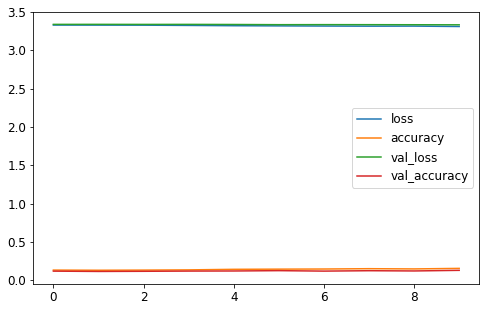

In [61]:

pd.DataFrame(history.history).plot(figsize=(8, 5))


In [105]:
preds = []
y_valid_test=[np.argmax(val) for val in y_valid]
n= len(y_valid_test)
for data in X_valid[:n]:
    pred = model.predict(data[np.newaxis, :, :])
    preds.append((np.argmax(pred)))

preds = np.array(preds)
vals = np.array(y_valid_test[:n])
rmse = [np.sqrt(np.sum(np.square(preds-vals))/n)]
print(rmse)

[3.73677668586176]


In [102]:
print(rmse)

[4.144092180441936]


In [56]:
print(rmse)

[3.8075188771692257]
